# Filter Based Feature Selection

In [120]:
import pandas as pd
import numpy as np


In [121]:
df = pd.read_csv('/content/train1.csv').drop(columns='subject')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [122]:
df['Activity'].value_counts() # Activity is target variable

,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [123]:
print(df.shape)

(7352, 562)


In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [125]:
X = df.drop('Activity', axis=1)
y = df['Activity']
y.sample(5)

,Activity
4978,LAYING
4730,SITTING
7277,WALKING
174,WALKING_UPSTAIRS
151,WALKING_UPSTAIRS


In [126]:
# Encode the target variable
le= LabelEncoder()
y=le.fit_transform(y)

In [127]:
y

array([2, 2, 2, ..., 5, 5, 5])

In [128]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


### We calculate accuracy with all column. After feature selection we will again calculate accuracy.

In [130]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9802855200543847


# 1. First of all we remove duplicate columns

In [131]:

def get_duplicate_columns(df):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes() # Eta puro column er shob valuer binary niye ekshathe kore single boro byte object return korbe
        except AttributeError:
            current_column_hash = current_column.to_string().encode() # shob value string hoye jay, pore index+ value mile multi line single boro string hoy, er por sheta encode hoy byte e.

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [132]:
duplicate_columns = get_duplicate_columns(X_train)


In [133]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [134]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [135]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [136]:
print(X_train.shape)
print(X_test.shape)

(5881, 540)
(1471, 540)


# 2. Variance Threshold:

In [137]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.05)

In [138]:
sel.fit(X_train) # This will calculate variance of every column

VarianceThreshold(threshold=0.05)

In [139]:
sel.get_support() # Columns which do not cross the threshold are false.

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,

In [140]:
sum(~sel.get_support()) # these column's variance is less than threshold

np.int64(191)

In [141]:
sum(sel.get_support())

np.int64(349)

In [142]:
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [143]:
columns=X_train.columns[sel.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [144]:
X_train = sel.transform(X_train) # This will delete all the columns which do not cross threshol value
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [145]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


# 3. Correlation

In [146]:
import seaborn as sns

<Axes: >

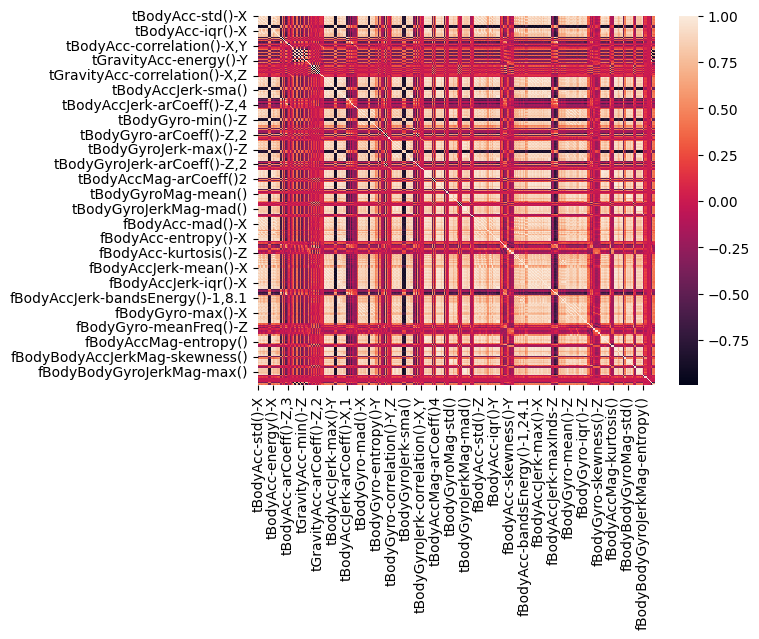

In [147]:
sns.heatmap(X_train.corr())

In [148]:
corr_matrix = X_train.corr()
corr_matrix

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,-0.061190,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,-0.103492,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,-0.095347,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,-0.055098,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,-0.101235,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.023914,-0.002241,-0.010535,0.024098,-0.005865,-0.014838,0.029230,-0.000207,-0.023622,-0.008700,...,-0.024274,0.031310,0.021829,-0.006297,0.013870,1.000000,-0.104987,-0.009878,-0.006218,-0.011178
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.000472,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,0.077000,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,-0.093215,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205


In [149]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1508


In [150]:
columns_to_drop = set(columns_to_drop) # this will drop duplicate columns
len(columns_to_drop)

197

In [151]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [152]:
print(X_train.shape)
print(X_test.shape)

(5881, 152)
(1471, 152)


# 4.  ANOVA

In [153]:
from sklearn.feature_selection import f_classif, SelectKBest

sel=SelectKBest(f_classif,k=100) # This will give me 100 best column by calculating f ratio of each column with Y

sel.fit(X_train,y_train)


SelectKBest(k=100)

In [154]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [155]:
X_train.columns[sel.get_support()] # ei column gulo holo best 100

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [156]:
columns = X_train.columns[sel.get_support()]

In [157]:
X_train = sel.transform(X_train) # best column gulo rekhe baki gulo drop kore dibe
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [158]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


# The moment of truth.
## We set out to check if the accuracy remains the same after feature selection.

In [159]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9694085656016316


Accuracy is quite similar.

# Chi-square Test

In [161]:
titanic = pd.read_csv('/content/train_titanic.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


Survived is our target column.

In [162]:
ct = pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
ct


Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [165]:
from scipy.stats import chi2_contingency

chi2_contingency(ct)

Chi2ContingencyResult(statistic=np.float64(263.05057407065567), pvalue=np.float64(1.0036732821369117e-55), dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

In [166]:
score = []

for feature in titanic.columns[:-1]:

    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])

    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

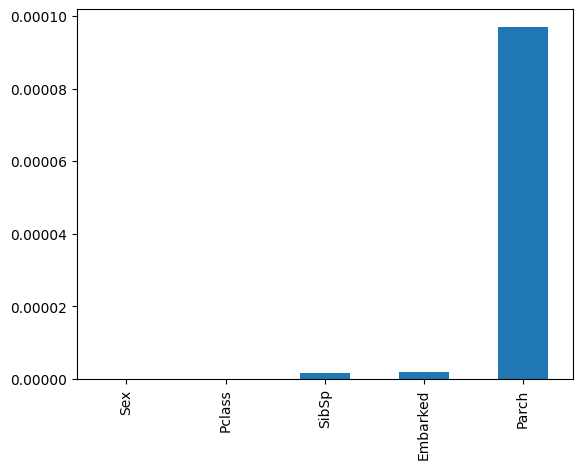

In [167]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

In [169]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
# assuming titanic is my DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

titanic_encoded

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,2,1,1,0,2,0
1,0,0,1,0,0,1
2,2,0,0,0,2,1
3,0,0,1,0,2,1
4,2,1,0,0,2,0
...,...,...,...,...,...,...
886,1,1,0,0,2,0
887,0,0,0,0,2,1
888,2,0,1,2,2,0
889,0,1,0,0,0,1


In [174]:
X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

In [175]:
# Calculate chi-squared stats
chi_scores = chi2(X, y)
chi_scores


(array([54.46586599, 92.70244698,  1.23604038, 10.09749911,  9.75545583]),
 array([1.58171493e-13, 6.07783826e-22, 2.66235537e-01, 1.48470676e-03,
        1.78791305e-03]))

In [177]:
chi_scores[1] # chi_scores[1] are the p-values of each feature.

array([1.58171493e-13, 6.07783826e-22, 2.66235537e-01, 1.48470676e-03,
       1.78791305e-03])

In [176]:
X.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

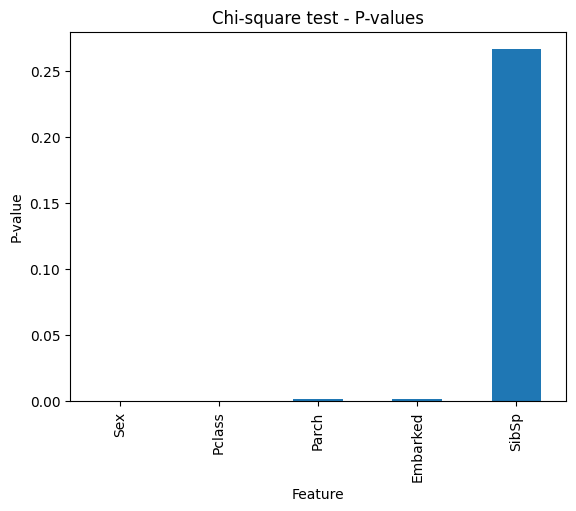

In [178]:

p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()